In [9]:
import pandas as pd
import numpy as np
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt

sns.set(style = 'white')
import os

In [11]:

print(os.listdir(r"C:\Users\Priyakshi Vashista\OneDrive\Desktop\dataset"))

['Telco_customer_churn.xlsx']


In [12]:


file_path = (r'C:\Users\Priyakshi Vashista\OneDrive\Desktop\dataset')

# Check if the file exists
if os.path.exists(file_path):
    # Check if the file has read permission
    if os.access(file_path, os.R_OK):
        print(f"You have read permission for the file: {file_path}")
    else:
        print(f"You do not have read permission for the file: {file_path}")
else:
    print(f"The file does not exist: {file_path}")


You have read permission for the file: C:\Users\Priyakshi Vashista\OneDrive\Desktop\dataset


In [13]:
file_path = 'dataset.csv'


In [14]:
import pandas as pd

# Correct variable name and add the file extension
telecom_cust = pd.read_excel(r"D:\kaggle\Telco_customer_churn.xlsx")

# Display the first few rows of the DataFrame
telecom_cust.head()



,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [15]:
telecom_cust.columns.values

array(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score',
       'CLTV', 'Churn Reason'], dtype=object)

In [16]:
telecom_cust.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [20]:
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.Total Charges, errors='coerce')
telecom_cust.isnull().sum()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1537408601.py, line 1)

In [21]:
telecom_cust.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telecom_cust.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn Label'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn Label'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

C:\Users\Priyakshi Vashista\AppData\Local\Temp\ipykernel_4244\1883524711.py:9: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_dummies = pd.get_dummies(df2)


,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Label,Churn Value,Churn Score,CLTV,...,Churn Reason_Lack of self-service on Website,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction
0,1,90003,33.964131,-118.272783,2,53.85,1,1,86,3239,...,0,0,0,0,0,0,0,0,0,0
1,1,90005,34.059281,-118.307420,2,70.70,1,1,67,2701,...,0,0,0,1,0,0,0,0,0,0
2,1,90006,34.048013,-118.293953,8,99.65,1,1,86,5372,...,0,0,0,1,0,0,0,0,0,0
3,1,90010,34.062125,-118.315709,28,104.80,1,1,84,5003,...,0,0,0,1,0,0,0,0,0,0
4,1,90015,34.039224,-118.266293,49,103.70,1,1,89,5340,...,0,0,0,0,0,0,0,0,0,0


plt.figure(figsize=(15,8))
df_dummies.corr()['Churn Label'].sort_values(ascending = False).plot(kind='bar')


<Axes: >

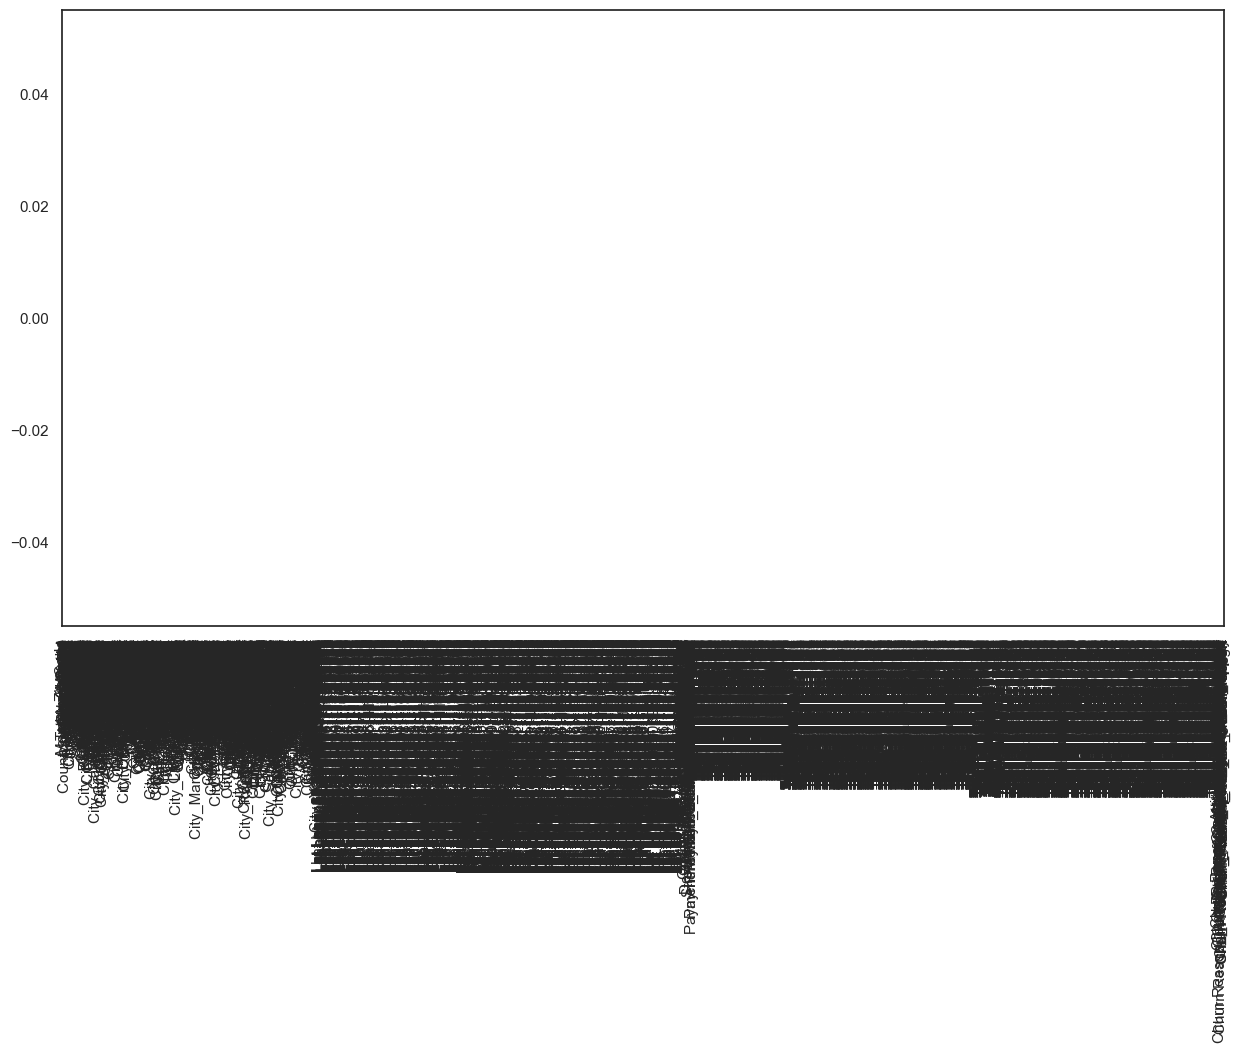

In [22]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn Label'].sort_values(ascending = False).plot(kind='bar')

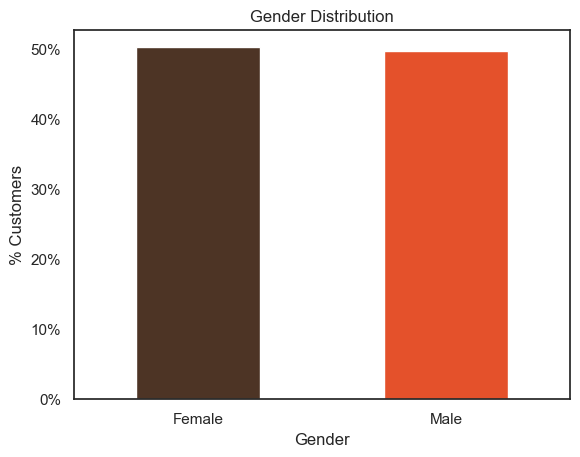

In [23]:
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['Gender'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

In [24]:
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')


Text(0.5, 1.0, '% of Senior Citizens')

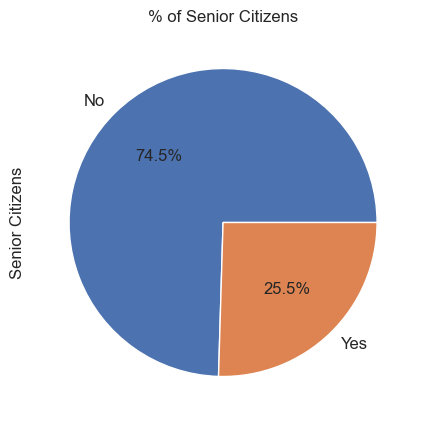

In [25]:
ax = (telecom_cust['Senior Citizen'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

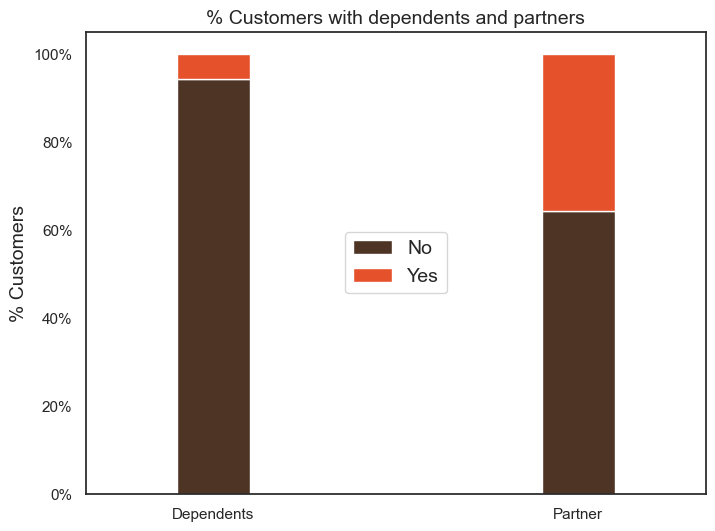

In [26]:
df2 = pd.melt(telecom_cust, id_vars=['CustomerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'CustomerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()

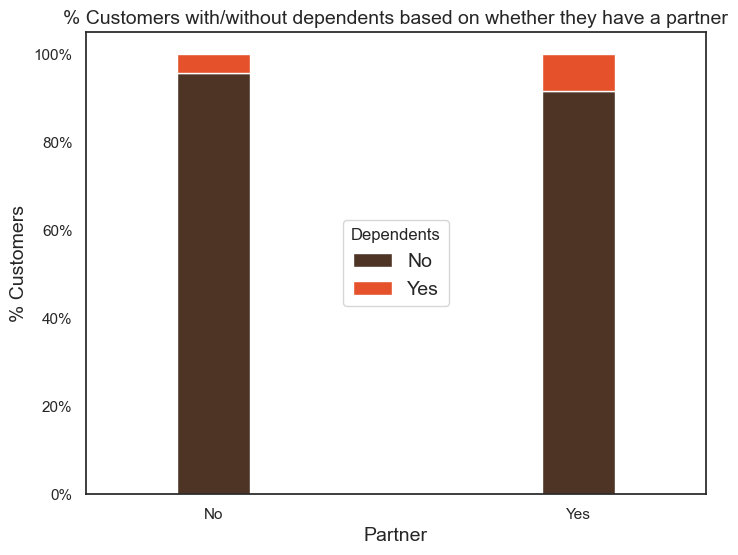

In [27]:
colors = ['#4D3425','#E4512B']
partner_dependents = telecom_cust.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

In [28]:
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

C:\Users\Priyakshi Vashista\AppData\Local\Temp\ipykernel_4244\2856277689.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telecom_cust['Tenure Months'], hist=True, kde=False,


Text(0.5, 1.0, '# of Customers by their tenure')

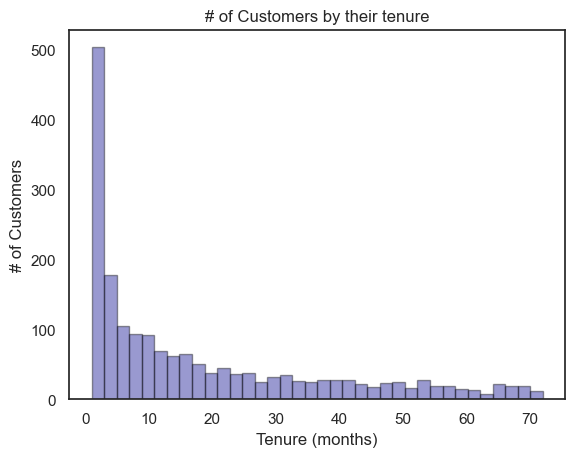

In [29]:
ax = sns.distplot(telecom_cust['Tenure Months'], hist=True, kde=False,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, '# of Customers by Contract Type')

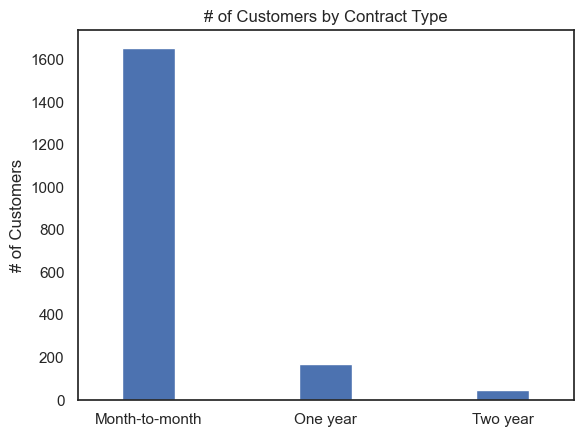

In [30]:
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

C:\Users\Priyakshi Vashista\AppData\Local\Temp\ipykernel_4244\622192261.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['Tenure Months'],
C:\Users\Priyakshi Vashista\AppData\Local\Temp\ipykernel_4244\622192261.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

Text(0.5, 1.0, 'Two Year Contract')

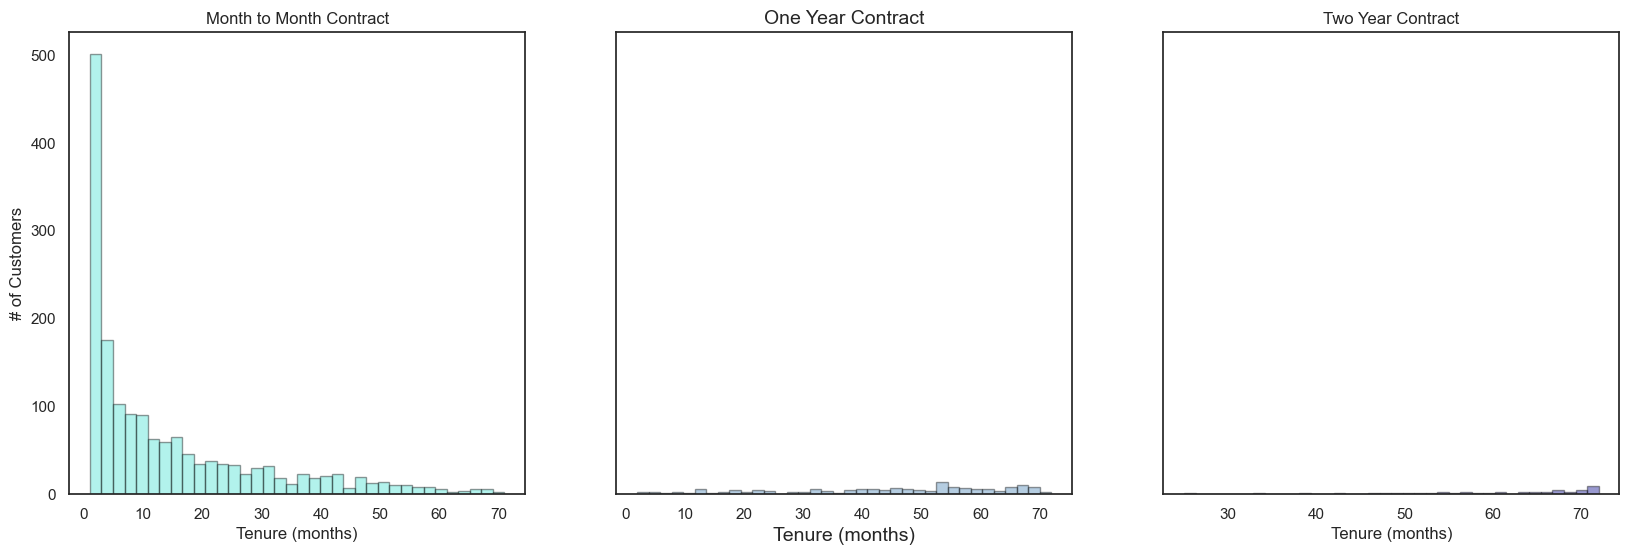

In [33]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['Tenure Months'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['Tenure Months'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                   ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['Tenure Months'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')


In [ ]:
telecom_cust.columns.values

array(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score',
       'CLTV', 'Churn Reason'], dtype=object)

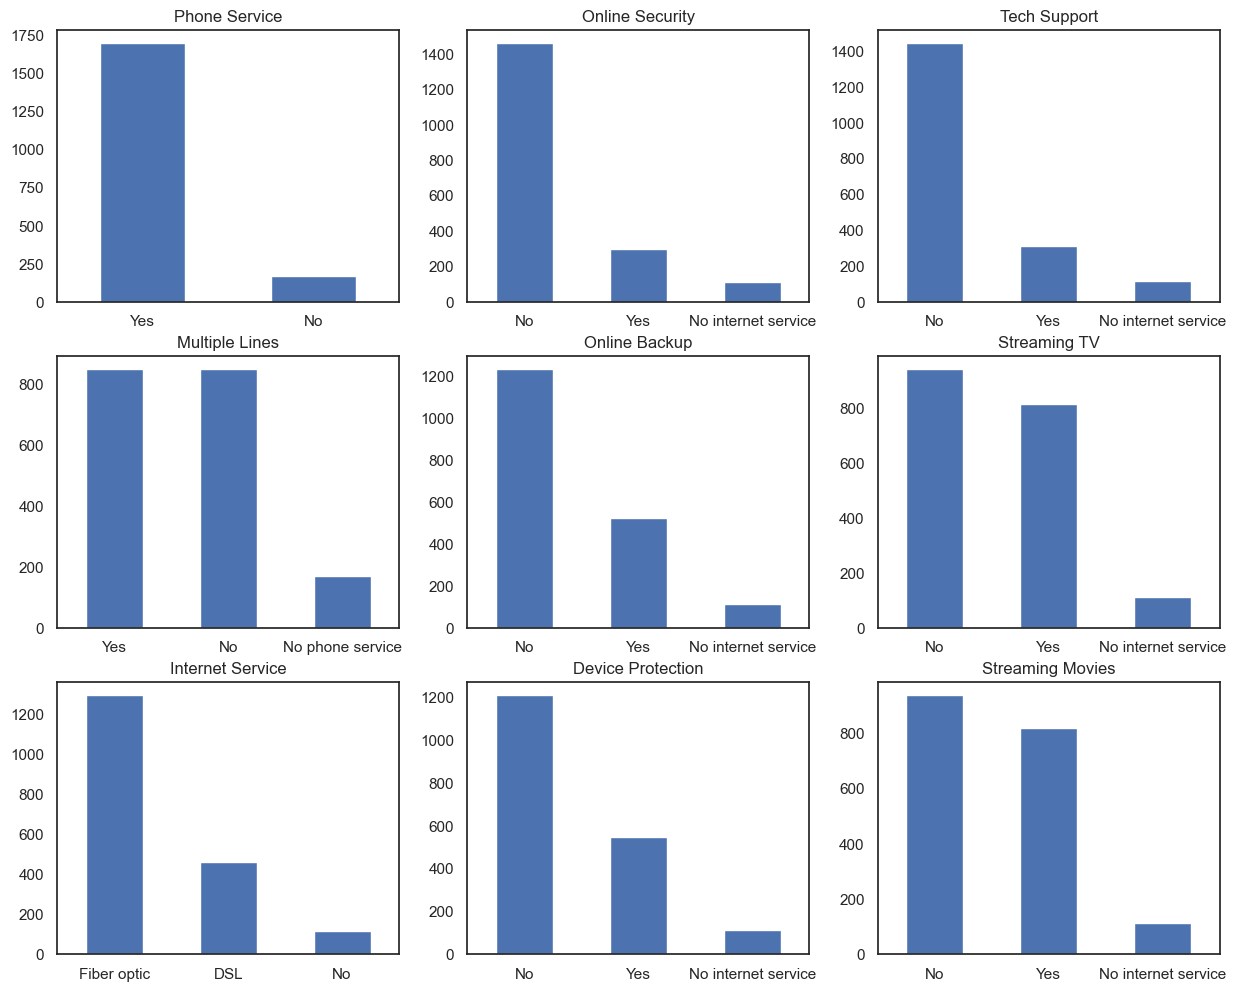

In [34]:
services = ['Phone Service','Multiple Lines','Internet Service','Online Security',
           'Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)

    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)

    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

<Axes: xlabel='Monthly Charges', ylabel='Total Charges'>

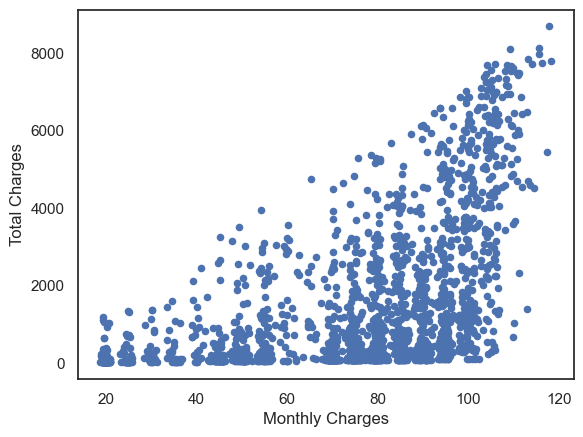

In [35]:
telecom_cust[['Monthly Charges', 'Total Charges']].plot.scatter(x = 'Monthly Charges',
                                                              y='Total Charges')

TypeError: Got both 'fontsize' and 'size', which are aliases of one another

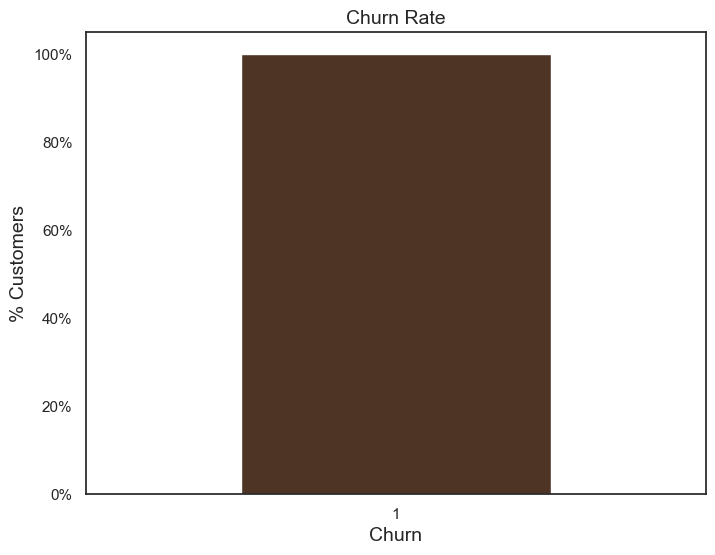

In [36]:
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['Churn Value'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

In [37]:
sns.boxplot(x = telecom_cust.Churn Value, y = telecom_cust.Tenure Months)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (4033128804.py, line 1)

Text(0, 0.5, '% Customers')

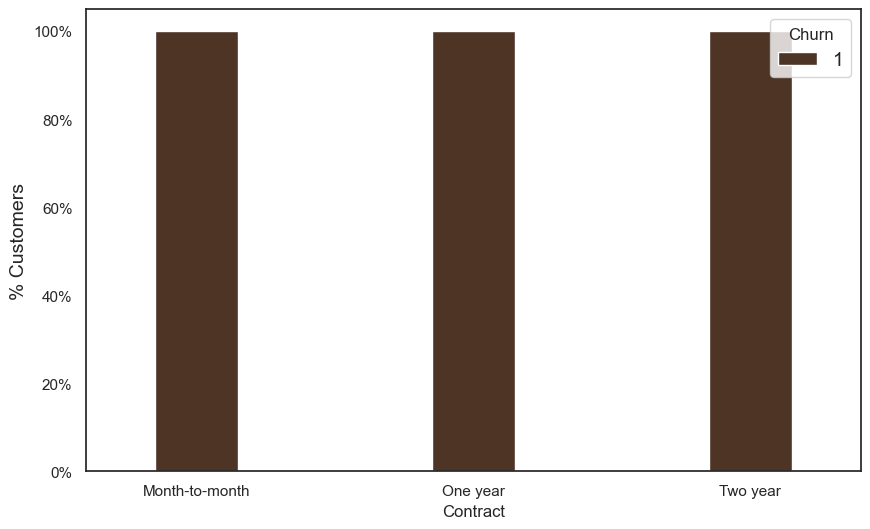

In [ ]:
colors = ['#4D3425','#E4512B']
contract_churn = telecom_cust.groupby(['Contract','Churn Value']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)

In [38]:
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)


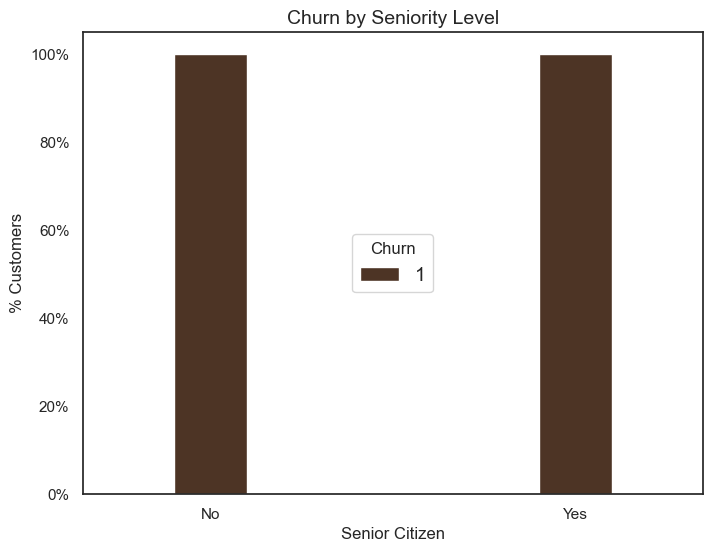

In [39]:
colors = ['#4D3425','#E4512B']
seniority_churn = telecom_cust.groupby(['Senior Citizen','Churn Value']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()

In [40]:
ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Text(0.9500000000000001, 40.0, '100%')

In [41]:
ax = sns.kdeplot(telecom_cust.Monthly Charges[(telecom_cust["Churn Value"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.Monthly Charges[(telecom_cust["Churn Label"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (755259140.py, line 1)

In [42]:
y = df_dummies['Churn Value'].values
X = df_dummies.drop(columns = ['Churn Value'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [45]:
import numpy as np

# Assuming y_train is your target variable
unique_classes = np.unique(y_train)

if len(unique_classes) < 2:
    print("Error: The target variable contains only one class label.")
else:
    print("The target variable contains examples from the following classes:", unique_classes)

Error: The target variable contains only one class label.


In [46]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler

# Assuming X_train and y_train are your feature matrix and target variable

# Check the class distribution
class_counts = np.bincount(y_train)
print("Class distribution before balancing:", class_counts)

# Balance the dataset using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

# Check the class distribution after balancing
class_counts_balanced = np.bincount(y_train_balanced)
print("Class distribution after balancing:", class_counts_balanced)

# Train the Logistic Regression model with the balanced dataset
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(X_train_balanced, y_train_balanced)

Class distribution before balancing: [   0 1308]


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [47]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler

# Assuming X_train and y_train are your feature matrix and target variable

# Check the class distribution
class_counts = np.bincount(y_train)
print("Class distribution before balancing:", class_counts)

# Calculate the inverse of the class distribution
sampling_strategy = {i: class_counts[i] / np.sum(class_counts) for i in np.unique(y_train)}

# Balance the dataset using RandomOverSampler
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

# Check the class distribution after balancing
class_counts_balanced = np.bincount(y_train_balanced)
print("Class distribution after balancing:", class_counts_balanced)

# Train the Logistic Regression model with the balanced dataset
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(X_train_balanced, y_train_balanced)

Class distribution before balancing: [   0 1308]


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [48]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression

# Assuming X_train and y_train are your feature matrix and target variable

# Check the class distribution
class_counts = np.bincount(y_train)
print("Class distribution before balancing:", class_counts)

# Calculate the inverse of the class distribution
sampling_strategy = {i: class_counts[i] / np.sum(class_counts) for i in np.unique(y_train)}

# Balance the dataset using RandomOverSampler
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

# Check the class distribution after balancing
class_counts_balanced = np.bincount(y_train_balanced)
print("Class distribution after balancing:", class_counts_balanced)

# Train the Logistic Regression model with the balanced dataset
# Check the number of unique classes in the target variable
if len(np.unique(y_train_balanced)) <= 1:
    raise ValueError("The target variable has only one class. Logistic Regression is not applicable.")

model = LogisticRegression()
result = model.fit(X_train_balanced, y_train_balanced)

Class distribution before balancing: [   0 1308]


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [49]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

d:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


NameError: name 'metrics' is not defined

<Axes: >

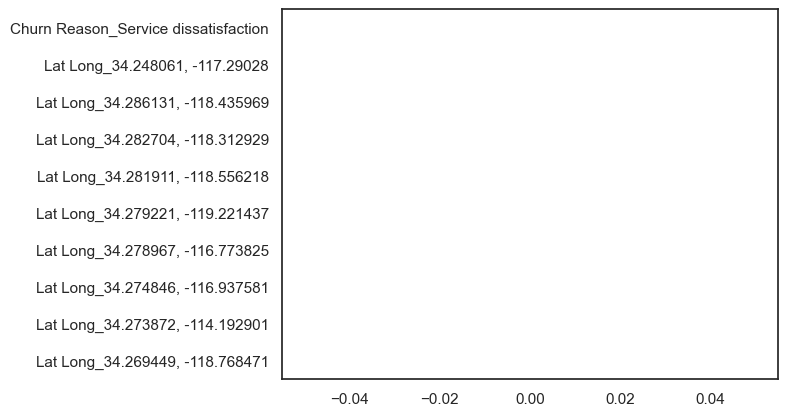

In [50]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
from sklearn.svm import SVC

model.svm = SVC(kernel='linear')
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

ValueError: The number of classes has to be greater than one; got 1 class

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,preds))

NameError: name 'preds' is not defined

In [53]:
ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=telecom_cust,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

ValueError: Could not interpret input 'gender'

In [54]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value)
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

NameError: name 'metrics' is not defined